图像已保存到: /home/pxl/myProject/血管分割/molong-深度插值/molong-utils/combined_image.png


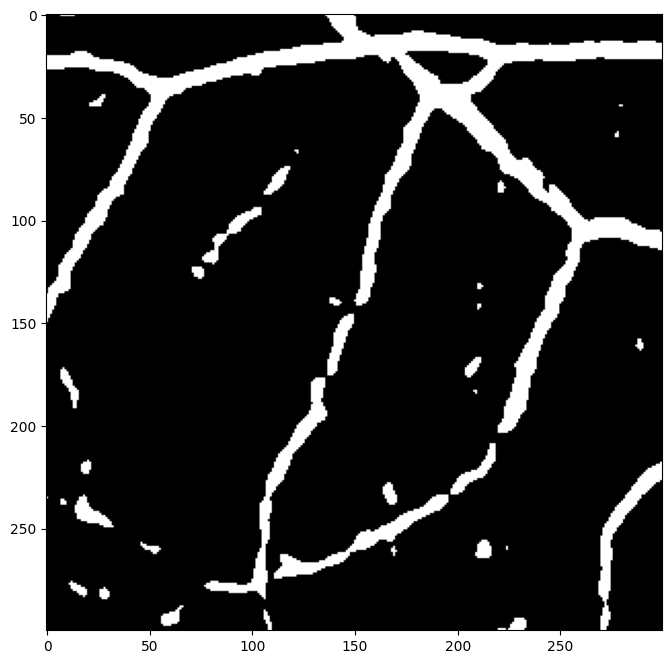

/home/pxl/miniconda3/envs/tissue/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/pxl/miniconda3/envs/tissue/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/pxl/miniconda3/envs/tissue/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/pxl/miniconda3/envs/tissue/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20687 (\N{CJK UNIFIED IDEOGRAPH-50CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/pxl/miniconda3/envs/tissue/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22788 (\

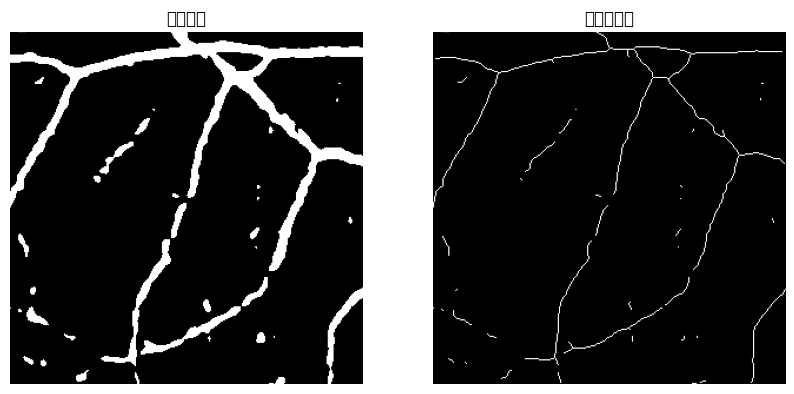

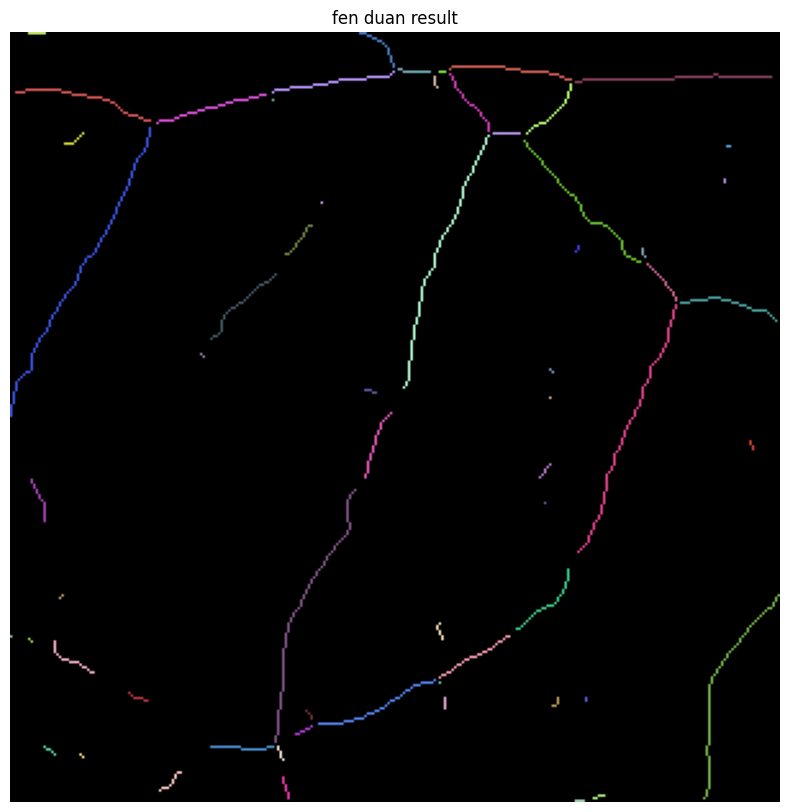

Segment 1:
  Endpoints: ((0, 7), (0, 13))
  Direction (k): 0.00 radians
  Length: 6.00 pixels
  Pixel Count: 7
----------------------------------------
Segment 2:
  Endpoints: ((0, 136), (13, 149))
  Direction (k): 0.79 radians
  Length: 18.38 pixels
  Pixel Count: 19
----------------------------------------
Segment 3:
  Endpoints: ((13, 172), (18, 218))
  Direction (k): 0.11 radians
  Length: 46.27 pixels
  Pixel Count: 48
----------------------------------------
Segment 4:
  Endpoints: ((14, 151), (15, 163))
  Direction (k): 0.08 radians
  Length: 12.04 pixels
  Pixel Count: 13
----------------------------------------
Segment 5:
  Endpoints: ((15, 149), (23, 102))
  Direction (k): 2.97 radians
  Length: 47.68 pixels
  Pixel Count: 48
----------------------------------------
Segment 6:
  Endpoints: ((15, 167), (15, 169))
  Direction (k): 0.00 radians
  Length: 2.00 pixels
  Pixel Count: 3
----------------------------------------
Segment 7:
  Endpoints: ((16, 171), (38, 186))
  Directi

/home/pxl/myProject/血管分割/molong-深度插值/molong-utils/no_one提取图结构.py:526: UserWarning: Glyph 25913 (\N{CJK UNIFIED IDEOGRAPH-6539}) missing from current font.
  plt.tight_layout()
/home/pxl/myProject/血管分割/molong-深度插值/molong-utils/no_one提取图结构.py:526: UserWarning: Glyph 36827 (\N{CJK UNIFIED IDEOGRAPH-8FDB}) missing from current font.
  plt.tight_layout()
/home/pxl/myProject/血管分割/molong-深度插值/molong-utils/no_one提取图结构.py:526: UserWarning: Glyph 21518 (\N{CJK UNIFIED IDEOGRAPH-540E}) missing from current font.
  plt.tight_layout()
/home/pxl/myProject/血管分割/molong-深度插值/molong-utils/no_one提取图结构.py:526: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  plt.tight_layout()
/home/pxl/myProject/血管分割/molong-深度插值/molong-utils/no_one提取图结构.py:526: UserWarning: Glyph 27573 (\N{CJK UNIFIED IDEOGRAPH-6BB5}) missing from current font.
  plt.tight_layout()
/home/pxl/myProject/血管分割/molong-深度插值/molong-utils/no_one提取图结构.py:526: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH

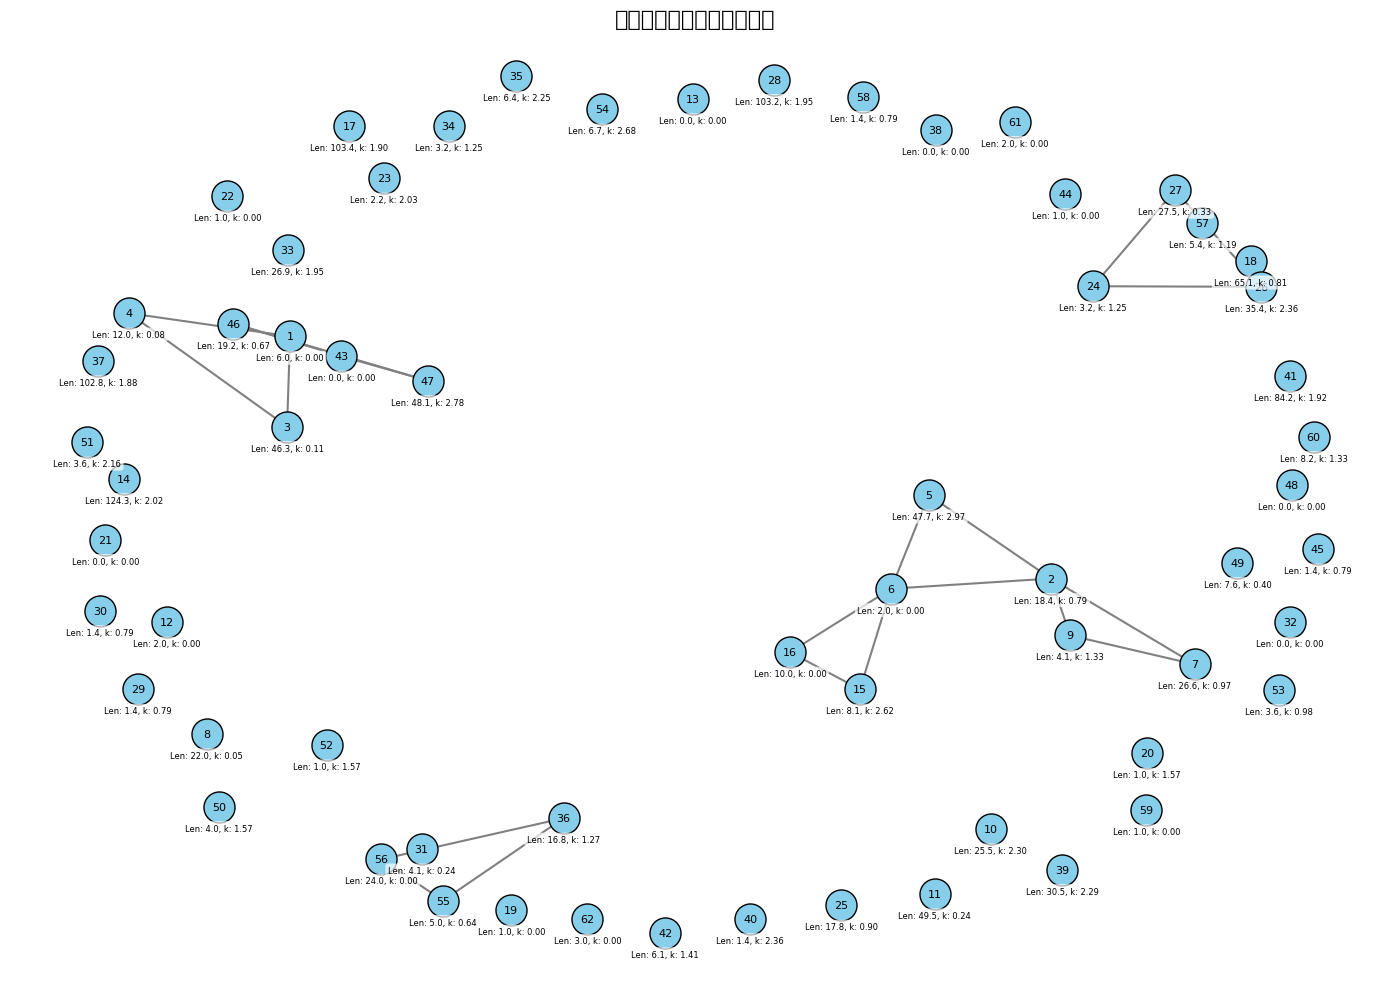

In [1]:
import 差分约束 as DifferentialConnection
import matplotlib.pyplot as plt
from scipy.spatial import distance
from skimage.measure import label, regionprops
import numpy as np
from PIL import Image
import cv2
import numpy as np
from skimage.morphology import skeletonize
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt
import random
import sys
import networkx as nx
from scipy.ndimage import distance_transform_edt
from scipy.spatial import distance
from numpy.polynomial.polynomial import Polynomial
from no_one提取图结构 import segment_and_visualize_vessels,crop_image,visualize_segments_andNo,visualize_segment_graph

# 获取连通组件
path = '/home/pxl/myProject/血管分割/molong-深度插值/molong-utils/数据集以及结果处理/pred.png'
# 一条分段
# position = (220, 230)  # 裁剪的起始位置 (x, y)
# size = (80, 60)  # 裁剪区域的尺寸 (width, height)
# 一条不分段
# position = (300, 230)  # 裁剪的起始位置 (x, y)
# size = (80, 60)  # 裁剪区域的尺寸 (width, height)
# 更大尺度
# position = (300, 250)  # 裁剪的起始位置 (x, y)
# size = (150, 150)  # 裁剪区域的尺寸 (width, height)
# position = (600, 230)  # 裁剪的起始位置 (x, y)
# size = (80, 60)  # 裁剪区域的尺寸 (width, height)
position = (160, 160)  # 裁剪的起始位置 (x, y)
size = (300, 300)  # 裁剪区域的尺寸 (width, height)
cropped_image = crop_image(path, position, size,True)
pred = np.array(cropped_image) 

plt.figure(figsize=(12, 8))
plt.imshow(cropped_image, cmap='gray')

_, binary = cv2.threshold(pred, 127, 255, cv2.THRESH_BINARY)
segment_graph = segment_and_visualize_vessels(binary.copy())

In [2]:
'''
segment_graph = {
    节点1: {
        'endpoints': ((x1, y1), (x2, y2)),   # 段的两个端点坐标
        'direction_k': k_value,             # 段的方向，斜率k值，范围是 -π 到 π
        'length': length_value,             # 段的长度（像素距离）
        'pixel_count': pixel_count_value    # 段的总像素数量
    },
    节点2: {
        'endpoints': ((x3, y3), (x4, y4)),
        'direction_k': k_value,
        'length': length_value,
        'pixel_count': pixel_count_value
    },
    ...
}

edges = {
    (节点1, 节点2): {
        'weight': 1                          # 默认的权重值，可以扩展为方向差异、长度等其他特征的权重
    },
    (节点1, 节点3): {
        'weight': 1
    },
    ...
}
'''

###——————————————————————————————开始第二part，先验判断
def find_closest_segment_endpoints(graph, target_node, max_distance):
    """
    找到与目标节点的两个端点最近的段。
    
    参数:
    - graph: nx.Graph, 当前的图。
    - target_node: int, 当前要查找的目标节点。
    - max_distance: float, 最大允许的空间距离。
    
    返回:
    - closest_nodes: list, 与目标节点的两个端点最近的段的索引列表。
    """
    target_endpoints = graph.nodes[target_node]['endpoints']
    closest_nodes = []

    # 遍历当前段的两个端点
    for endpoint in target_endpoints:
        min_distance = float('inf')
        closest_node = None

        # 遍历所有其他节点，寻找与当前端点最近的段
        for node, features in graph.nodes(data=True):
            if node == target_node:
                continue

            node_endpoints = features['endpoints']
            # 计算与当前端点的最小距离
            for ep in node_endpoints:
                distance = np.sqrt((endpoint[0] - ep[0])**2 + (endpoint[1] - ep[1])**2)
                if distance < min_distance and distance <= max_distance:
                    min_distance = distance
                    closest_node = node

        # 如果找到了符合条件的最近节点，则添加到结果列表
        if closest_node is not None:
            closest_nodes.append((closest_node, min_distance))

    return closest_nodes

def apply_static_graph_rules(graph, min_pixel_count=3, direction_threshold=np.pi/8, max_distance=20):
    """
    应用静态图规则对图进行优化，包括连通性和孤立团删除。
    
    参数:
    - graph: nx.Graph, 当前的段图结构。

    - min_pixel_count: int, 最小像素数量阈值。
    - direction_threshold: float, 方向相似度阈值。
    - max_distance: float, 最大允许的空间距离。
    
    返回:
    - updated_graph: nx.Graph, 经过规则优化后的图。
    """
    # 复制图用于修改
    updated_graph = graph.copy()
    
    # 规则 1：连通规则 - 连接空间上接近且方向相似的段
    for node_i, features_i in updated_graph.nodes(data=True):
        closest_nodes = find_closest_segment_endpoints(updated_graph, node_i, max_distance)
        
        for closest_node, distance in closest_nodes:
            k_i = features_i['direction_k']
            k_closest = updated_graph.nodes[closest_node]['direction_k']
            
            # 检查方向相似性
            if abs(k_i - k_closest) < direction_threshold:
                updated_graph.add_edge(node_i, closest_node, weight=1)
                print(f"添加边: ({node_i}, {closest_node}) - 符合连通条件")
                # TODO: 在此处修改feature_map，例如：
                # feature_map[y, x] = 1.5  # 表示潜在的连接

    # 规则 2：删除孤立团 - 删除不满足条件的孤立段
    for node, features in list(updated_graph.nodes(data=True)):
        if updated_graph.degree(node) == 0:
            if features['pixel_count'] < min_pixel_count:
                updated_graph.remove_node(node)
                print(f"删除孤立节点: {node} - 像素数量低于阈值")
                # TODO: 在此处修改feature_map，例如：
                # feature_map[y, x] = 0.1  # 表示低权重值

    return updated_graph


# updated_graph = apply_static_graph_rules(segment_graph)
# visualize_segment_graph(updated_graph)

(300, 300)


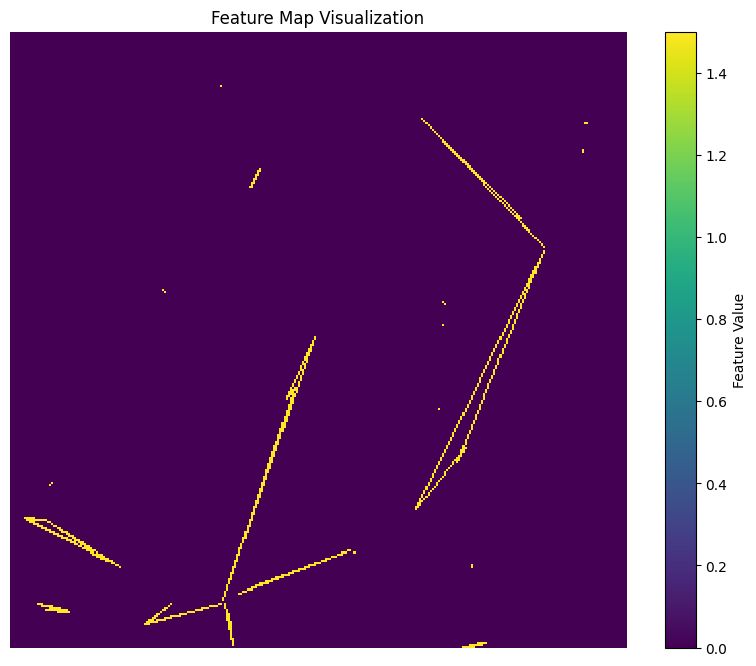

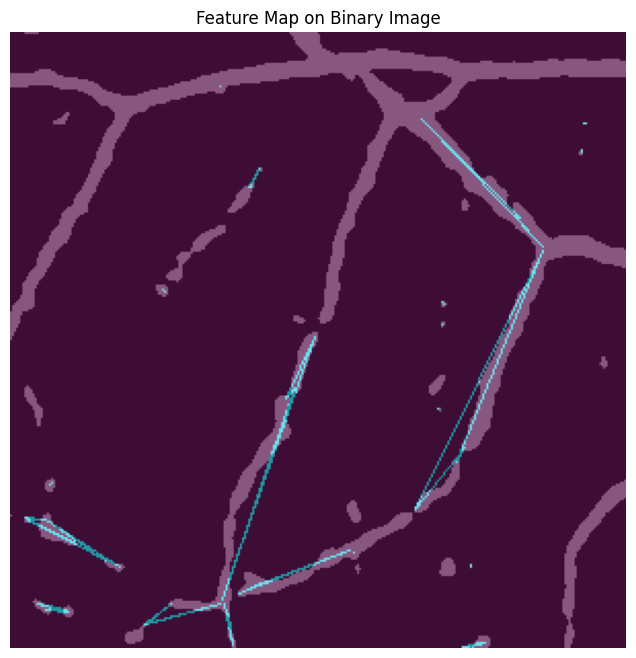

Max value: 0.5596518060702226
Min value: 0.0


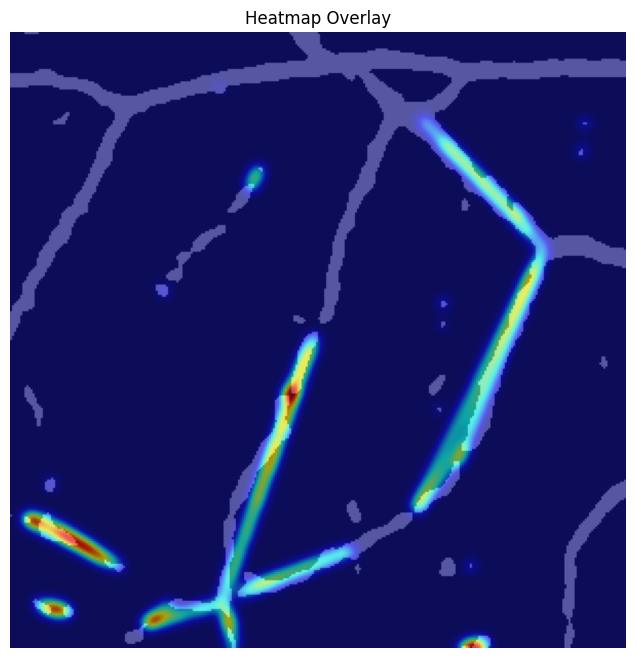

In [3]:
def generate_line_pixels(point1, point2):
    """
    给定两个端点，生成在这两个端点之间的所有像素坐标。
    
    参数:
    - point1: 第一个端点的坐标 (x1, y1)。
    - point2: 第二个端点的坐标 (x2, y2)。
    
    返回:
    - pixels: 端点之间所有像素的坐标列表 [(x, y), ...]。
    """
    x1, y1 = point1
    x2, y2 = point2
    pixels = []

    # 使用 Bresenham 算法来生成直线上的所有像素
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    sx = 1 if x1 < x2 else -1
    sy = 1 if y1 < y2 else -1
    err = dx - dy

    while True:
        # 将当前坐标添加到像素列表中
        pixels.append((x1, y1))
        
        # 如果到达终点，则退出
        if (x1, y1) == (x2, y2):
            break
        
        e2 = 2 * err
        if e2 > -dy:
            err -= dy
            x1 += sx
        if e2 < dx:
            err += dx
            y1 += sy

    return pixels

unet_feature_size = (pred.shape[0],pred.shape[1])

print(unet_feature_size)
def apply_static_graph_rules(graph, min_pixel_count=3, direction_threshold=np.pi/8, max_distance=20,debug=False):
    """
    应用静态图规则对图进行优化，包括连通性和孤立团删除。
    
    参数:
    - graph: nx.Graph, 当前的段图结构。
    - unet_feature_size: tuple, UNet 特征图的大小 (H, W)。
    - min_pixel_count: int, 最小像素数量阈值。
    - direction_threshold: float, 方向相似度阈值。
    - max_distance: float, 最大允许的空间距离。
    
    返回:
    - updated_graph: nx.Graph, 经过规则优化后的图。
    - feature_map: np.array, 更新后的 feature_map。
    """
    # 1. 初始化空的 feature_map
    feature_map = np.zeros(unet_feature_size)
    
    # 复制图用于修改
    updated_graph = graph.copy()
    
    # 规则 1：连通规则 - 连接空间上接近且方向相似的段
    for node_i, features_i in updated_graph.nodes(data=True):
        # 2. 顶点获取坐标
        point1, point2 = features_i['endpoints']
        closest_nodes = find_closest_segment_endpoints(updated_graph, node_i, max_distance)
        
        for closest_node, _ in closest_nodes:
            k_i = features_i['direction_k']
            k_closest = updated_graph.nodes[closest_node]['direction_k']
            
            # 2. 顶点获取坐标
            point3, point4 = updated_graph.nodes[closest_node]['endpoints']

            # 检查方向相似性
            if abs(k_i - k_closest) < direction_threshold:
                updated_graph.add_edge(node_i, closest_node, weight=1)
                if(debug):
                    print(f"添加边: ({node_i}, {closest_node}) - 符合连通条件")

                # 3. 拟合直线路径
                pixels1 = generate_line_pixels(point1, point3)
                pixels2 = generate_line_pixels(point2, point3)
                pixels3 = generate_line_pixels(point1, point4)
                pixels4 = generate_line_pixels(point2, point4)
                
                # 遍历所有像素列表，更新 feature_map
                for pixels in [pixels1, pixels2, pixels3, pixels4]:
                    for (x, y) in pixels:
                        if 0 <= x < feature_map.shape[0] and 0 <= y < feature_map.shape[1]:
                            feature_map[x, y] = 1.5
                            if(debug):
                                print(f"设置权重: feature_map[{x}, {y}] = 1.5")  # 打印日志

    # 规则 2：删除孤立团 - 删除不满足条件的孤立段
    for node, features in list(updated_graph.nodes(data=True)):
        if updated_graph.degree(node) == 0:
            if features['pixel_count'] < min_pixel_count:
                updated_graph.remove_node(node)
                if(debug):
                    print(f"删除孤立节点: {node} - 像素数量低于阈值")

                # 2. 顶点获取坐标
                point1, point2 = features['endpoints']
                # 3. 拟合直线路径
                pixels = generate_line_pixels(point1, point2)
                for pixel in pixels:
                    # 4. 设置对应坐标处权重
                    if 0 <= pixel[0] < feature_map.shape[0] and 0 <= pixel[1] < feature_map.shape[1]:
                        feature_map[pixel[0], pixel[1]] = 1.5
                        if(debug):
                            print(f"设置权重: feature_map[{pixel[0]}, {pixel[1]}] = 0.1")  # 打印日志

    return updated_graph, feature_map




def visualize_feature_map(feature_map, title="Feature Map Visualization"):
    """
    可视化 feature_map。

    参数:
    - feature_map: np.array, 需要可视化的特征图。
    - title: str, 可视化图像的标题 (默认: "Feature Map Visualization")。
    """
    plt.figure(figsize=(10, 8))
    # 使用 plt.imshow 可视化特征图，并应用颜色映射 'viridis' 或其他颜色映射
    plt.imshow(feature_map, cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Feature Value')  # 显示颜色条，标记特征值
    plt.title(title)
    plt.axis('off')  # 隐藏坐标轴
    plt.show()
    
def visualize_featureMap_on_binaryImage(feature_map, binary_image, alpha=0.6, title="Feature Map on Binary Image"):
    """
    在二值图像上可视化 feature_map。

    参数:
    - feature_map: np.array, 需要可视化的特征图。
    - binary_image: np.array, 二值图像，用作背景。
    - alpha: float, 叠加透明度 (默认: 0.6)。
    - title: str, 可视化图像的标题 (默认: "Feature Map on Binary Image")。
    """
    # 确保二值图像是单通道灰度图，并将其转换为 3 通道彩色图像
    if len(binary_image.shape) == 2:
        colored_binary = cv2.cvtColor(binary_image, cv2.COLOR_GRAY2BGR)
    else:
        colored_binary = binary_image

    # 将 feature_map 归一化到 [0, 1] 范围以匹配颜色映射
    norm_feature_map = (feature_map - np.min(feature_map)) / (np.max(feature_map) - np.min(feature_map))
    
    # 使用颜色映射将 feature_map 转换为彩色
    feature_map_colored = plt.cm.viridis(norm_feature_map)[:, :, :3]  # 去掉 alpha 通道

    # 将彩色特征图像转换为 [0, 255] 范围的 uint8 类型
    feature_map_colored = (feature_map_colored * 255).astype(np.uint8)

    # 将二值图像和特征图像叠加
    overlay = cv2.addWeighted(colored_binary, 1 - alpha, feature_map_colored, alpha, 0)

    # 显示结果
    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

from scipy.ndimage import gaussian_filter

def apply_gaussian_to_pixels(feature_map, sigma=3.0):
    """
    对 feature_map 中的非零像素点应用高斯核扩展权重范围。
    
    参数:
    - feature_map: np.array, 输入的特征图。
    - sigma: float, 高斯核的标准差 (默认: 2.0)。
    
    返回:
    - expanded_feature_map: np.array, 经过高斯扩展后的特征图。
    """
    # 创建一个与 feature_map 大小相同的空图像
    expanded_feature_map = np.zeros_like(feature_map) * 3
    
    # 获取所有非零像素的位置
    non_zero_pixels = np.argwhere(feature_map > 0)
    
    # 对每个非零像素点应用高斯核
    for pixel in non_zero_pixels:
        temp_map = np.zeros_like(feature_map)
        temp_map[pixel[0], pixel[1]] = feature_map[pixel[0], pixel[1]]
        # 应用高斯滤波器在这个点上扩散
        expanded_feature_map += gaussian_filter(temp_map, sigma=sigma)
    
    return expanded_feature_map

def visualize_heatmap_on_image(feature_map, binary_image, sigma=3.0, alpha=0.6, colormap='jet', title="Heatmap Overlay"):
    """
    生成并显示特征图的热力图效果，应用高斯扩展并叠加在原始二值图像上。
    
    参数:
    - feature_map: np.array, 输入的特征图。
    - binary_image: np.array, 输入的二值图像，用于显示骨架背景。
    - sigma: float, 高斯核的标准差 (默认: 2.0)。
    - alpha: float, 热力图的透明度 (默认: 0.6)。
    - colormap: str, 使用的颜色映射 (默认: 'jet')。
    - title: str, 可视化图像的标题 (默认: "Heatmap Overlay")。
    """
    # 对 feature_map 应用高斯核扩展
    expanded_feature_map = apply_gaussian_to_pixels(feature_map, sigma=sigma)
    print("Max value:", np.max(expanded_feature_map))
    print("Min value:", np.min(expanded_feature_map))
    # 确保二值图像为单通道灰度图
    if len(binary_image.shape) == 3:
        gray_image = cv2.cvtColor(binary_image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = binary_image

    # 归一化 expanded_feature_map 到 [0, 255]
    normalized_feature_map = cv2.normalize(expanded_feature_map, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # 使用 OpenCV 生成彩色热力图
    heatmap = cv2.applyColorMap(normalized_feature_map, cv2.COLORMAP_JET)

    # 将二值图像转换为 3 通道
    colored_binary = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)

    # 叠加热力图在二值图像上
    overlay = cv2.addWeighted(colored_binary, 1 - alpha, heatmap, alpha, 0)

    # 显示最终结果
    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

updated_graph,feature_map= apply_static_graph_rules(segment_graph,debug=False)
visualize_feature_map(feature_map)
visualize_featureMap_on_binaryImage(feature_map,pred)
visualize_heatmap_on_image(feature_map,pred)